In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False
%matplotlib inline

In [31]:
# Càrrega de les dades a visualitzar
df=pd.read_excel("https://raw.githubusercontent.com/RicardPI/Streamlit-App-Covid-vs-ventes-2020/master/Data/Dades_Ventes.xlsx")
df.drop(columns="Unnamed: 0",inplace=True)
df.head()

,Fecha,TipoEstablecimiento,Familia,Importe Venta
0,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,CARAMELOS DE GOMA,425.082
1,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,CARAMELOS,288.480
2,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,CHOCOLATES SNACKS,237.468
3,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,REGALIZ,187.980
4,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,BEBIDAS,120.006


In [32]:
#Check de valors nulls

df.isna().sum()

Fecha                  0
TipoEstablecimiento    0
Familia                0
Importe Venta          0
dtype: int64

In [33]:
#Càrrega de les dades de covid:
#Font = https://analisi.transparenciacatalunya.cat/es/browse?q=covid&sortBy=relevance

covid = pd.read_csv("https://raw.githubusercontent.com/RicardPI/Streamlit-App-Covid-vs-ventes-2020/master/Data/COVID-19__Defuncions.csv")
covid.head()

,setmana_epidemiologica,any,data_inici,data_final,codi_regio,nom_regio,codi_ambit,nom_ambit,sexe,grup_edat,index_socioeconomic,casos,poblacio
0,27,2022,04/07/2022,10/07/2022,78,BARCELONA,7803,BARCELONA CIUTAT,Home,80 o més,3,8.0,10856.0
1,44,2022,31/10/2022,06/11/2022,78,BARCELONA,7802,METROPOLITANA NORD,Dona,80 o més,2,1.0,15330.0
2,4,2022,24/01/2022,30/01/2022,78,BARCELONA,7802,METROPOLITANA NORD,Home,80 o més,4,8.0,7642.0
3,32,2022,08/08/2022,14/08/2022,78,BARCELONA,7803,BARCELONA CIUTAT,Home,80 o més,3,2.0,10856.0
4,45,2022,07/11/2022,13/11/2022,64,GIRONA,6400,GIRONA,Home,70 a 79,3,1.0,18494.0


In [34]:
#Check de valors nulls

covid.isna().sum()

setmana_epidemiologica    0
any                       0
data_inici                0
data_final                0
codi_regio                0
nom_regio                 0
codi_ambit                0
nom_ambit                 0
sexe                      0
grup_edat                 0
index_socioeconomic       0
casos                     0
poblacio                  0
dtype: int64

In [35]:
#Es filtra la regio de girona i l'any 2020
covid=covid[(covid.codi_regio == 64) & (covid["any"] == 2020)]
covid.head()

,setmana_epidemiologica,any,data_inici,data_final,codi_regio,nom_regio,codi_ambit,nom_ambit,sexe,grup_edat,index_socioeconomic,casos,poblacio
204,53,2020,28/12/2020,03/01/2021,64,GIRONA,6400,GIRONA,Home,60 a 69,2,1.0,3287.0
218,19,2020,04/05/2020,10/05/2020,64,GIRONA,6400,GIRONA,Home,60 a 69,2,1.0,3287.0
241,14,2020,30/03/2020,05/04/2020,64,GIRONA,6400,GIRONA,Home,60 a 69,2,1.0,3287.0
323,31,2020,27/07/2020,02/08/2020,64,GIRONA,6400,GIRONA,Home,80 o més,4,1.0,6197.0
412,46,2020,09/11/2020,15/11/2020,64,GIRONA,6400,GIRONA,Dona,80 o més,4,11.0,10436.0


Els dos datasets a tractar estan sense valors nuls. En el cas del dataset de ventes, és un dataset que ve sense cap outlier i té un control escrúpul per a que estigui llest per a ser tractat.
En el cas del dataset del covid no se sap. Per això faré un boxplot per detectar possibles valors outliers en la variable casos de covid (és la variable que utilitzarem per detectar les onades de covid del 2020).

### Anàlisi outliers de casos en el dataset covid

Amb les dades descriptives no s'observa cap tipus d'outlier en la variable casos

In [36]:
# Es fa un pivot table per agregar les morts en setmanes.

casos_setmanals = covid.pivot_table(index="setmana_epidemiologica",values="casos",aggfunc="sum")
print(casos_setmanals.head(),"\n")
print("Estadística descriptiva\n",casos_setmanals.casos.describe())

                        casos
setmana_epidemiologica       
12                       27.0
13                      114.0
14                      143.0
15                      144.0
16                      104.0 

Estadística descriptiva
 count     42.000000
mean      37.642857
std       38.437038
min        1.000000
25%        6.250000
50%       21.500000
75%       59.750000
max      144.000000
Name: casos, dtype: float64


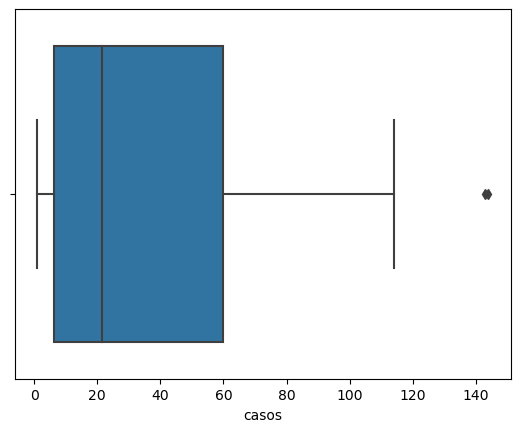

In [37]:
sns.boxplot(data=casos_setmanals,x="casos")
#reset d'index
casos_setmanals.reset_index(inplace=True)

S'observa un cas de 144 morts en una setmana, en el cas de catalunya a les onades màximes del 2020, es morien 800 persones al dia per lo que és perfectament plausible que en la provincia de girona hi haguessin 144 morts en una setmana i en temps de pic. És per això que no es considera un outlier.

Dit això, és considera que la dada és bona per als dos datasets

## Observació de les morts per covid a partir de la setmana 12 del 2020 a  la provincia de girona

<AxesSubplot:ylabel='casos'>

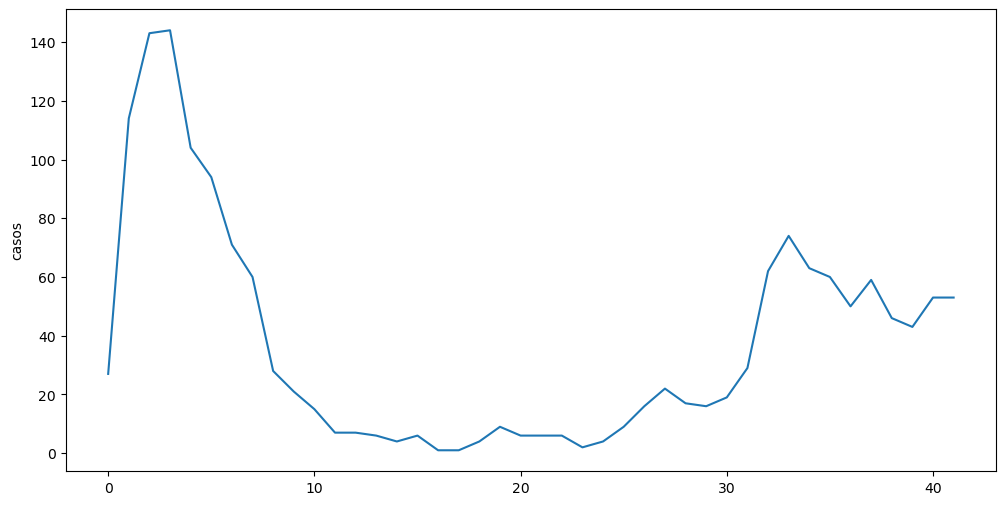

In [38]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(data =casos_setmanals,y=casos_setmanals.casos,x=casos_setmanals.index)

## Creació de calendari i agrupament del dataset de ventes per setmana, tipo d'establiment i familia

In [39]:
# primer de tot es crea un calendari per indicar a quina setmana pertany cada data en el 2020.
calendari = pd.DataFrame( {"data":pd.date_range("2020-01-01","2020-12-31")})
calendari["Mes"] = calendari.data.dt.month
calendari["Setmana"] = calendari.data.dt.isocalendar().week
calendari.head()

,data,Mes,Setmana
0,2020-01-01,1,1
1,2020-01-02,1,1
2,2020-01-03,1,1
3,2020-01-04,1,1
4,2020-01-05,1,1


In [40]:
# Es fa un left join del dataframe df amb el calendari, amb la paraula clau data
df=df.merge(calendari,how="left",left_on="Fecha",right_on="data")
df.drop(columns="data",inplace=True)
df.head()

,Fecha,TipoEstablecimiento,Familia,Importe Venta,Mes,Setmana
0,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,CARAMELOS DE GOMA,425.082,12,53
1,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,CARAMELOS,288.480,12,53
2,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,CHOCOLATES SNACKS,237.468,12,53
3,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,REGALIZ,187.980,12,53
4,2020-12-31,VID - VIDEO CLUB-LOCUTORIO,BEBIDAS,120.006,12,53


In [41]:
# S'agrupa les ventes en funció de tipo d'establiment, Familia i mes
df = df.pivot_table(index=["Mes","TipoEstablecimiento","Familia"],values="Importe Venta",aggfunc="sum")

In [42]:
df.reset_index(inplace=True)
df.head()

,Mes,TipoEstablecimiento,Familia,Importe Venta
0,1,A - AUTOSERVICIO,ACCESORIOS TIENDAS GOL,1.620
1,1,A - AUTOSERVICIO,ACEITUNAS Y ENCURTIDOS,55.872
2,1,A - AUTOSERVICIO,APERITIVOS,809.322
3,1,A - AUTOSERVICIO,ARTICULOS FUMADOR,92.850
4,1,A - AUTOSERVICIO,BEBIDAS,753.078


In [43]:
#es fa un merge amb el calendari per incorporar el mes
casos_setmanals = casos_setmanals.merge(calendari,how="left",left_on="setmana_epidemiologica", right_on="Setmana")
casos_setmanals.drop(columns=["data","Setmana"],inplace=True)
casos_setmanals.drop_duplicates(inplace=True)

#Es fa un resample a mesos
casos_setmanals = casos_setmanals.pivot_table(index="Mes",values="casos",aggfunc="sum").reset_index()
casos_setmanals.head()

,Mes,casos
0,3,284.0
1,4,556.0
2,5,195.0
3,6,30.0
4,7,21.0


## Unió dels dos Datasets, transaccional i morts setmanals de covid

In [44]:
# Unió dels datasets
final = df.merge(casos_setmanals,how="left",on="Mes")

# Com que no hi han hagut morts finsla setmana 12, fins a aquesta, els casos i setmana epidemiologica s'ha omplert amb valors 
# nan que els passem a valors nulls.
final.fillna(0,inplace=True)
#També s'eliminen 
final.drop_duplicates(inplace=True)
final.head()

,Mes,TipoEstablecimiento,Familia,Importe Venta,casos
0,1,A - AUTOSERVICIO,ACCESORIOS TIENDAS GOL,1.620,0.0
1,1,A - AUTOSERVICIO,ACEITUNAS Y ENCURTIDOS,55.872,0.0
2,1,A - AUTOSERVICIO,APERITIVOS,809.322,0.0
3,1,A - AUTOSERVICIO,ARTICULOS FUMADOR,92.850,0.0
4,1,A - AUTOSERVICIO,BEBIDAS,753.078,0.0


## Descàrrega del df final a un arxiu excel per pujar-ho al powerbi

In [45]:
# final.to_excel("df_final.xlsx")

In [46]:
# final.to_pickle("df_final.pkl")